# Kaggle VSB power line competition

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Utils.DataExtractor import DataExtractor
from Utils.UtilsViz import print_df_cols

In [2]:
DATA_DIR = "/media/srihari/DATA/Dev/Sources/Projects/GitProjects/Kaggle_VSBPowerLineFaultDetection/all"

In [3]:
os.chdir(DATA_DIR)
print(os.listdir(os.getcwd()))

['metadata_test.csv', 'metadata_train.csv', 'sample_submission.csv', 'test.parquet', 'train.parquet']


In [4]:
data_extractor = DataExtractor()

file_name = "metadata_train.csv"
file_path = os.path.join(DATA_DIR, file_name)
metatrain_data = data_extractor.read_csv(fpath=file_path)
if metatrain_data.empty:
    exit(1)
    
print_df_cols(metatrain_data)

Columns : 
	 signal_id   -->   int64
	 id_measurement   -->   int64
	 phase   -->   int64
	 target   -->   int64



In [5]:
signal_ids = metatrain_data["signal_id"].unique()

In [17]:
metatrain_data[metatrain_data["signal_id"]==0]

,signal_id,id_measurement,phase,target
0,0,0,0,0


In [19]:
metatrain_data[metatrain_data["signal_id"]==3]

,signal_id,id_measurement,phase,target
3,3,1,0,1


In [6]:
# Extract one signal from the training data parquet file
train_file = "train.parquet"


IndexError: index 6 is out of bounds for axis 0 with size 6

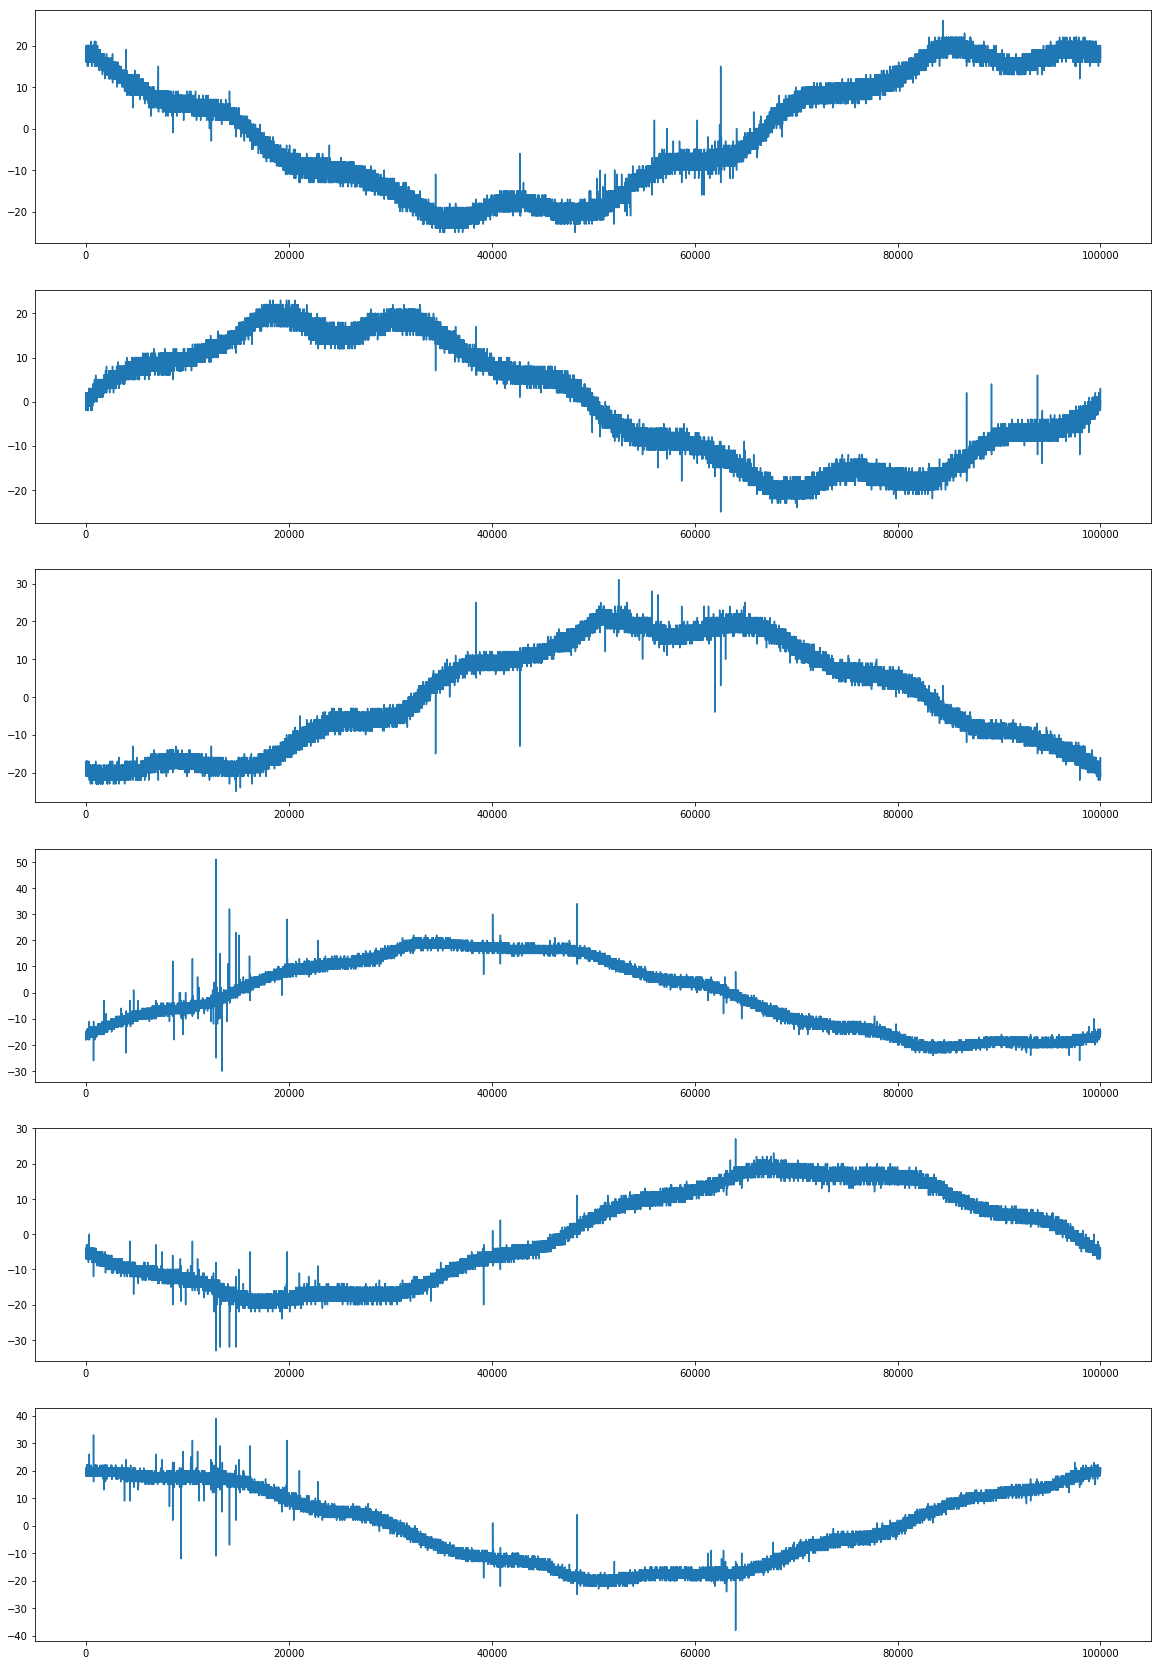

In [26]:
id = list(range(0, 6))
train_data = data_extractor.read_parquet(fpath=train_file, columns=[str(_) for _ in id])
f, ax = plt.subplots(6,1, figsize=(20,30))
for _ in id:
    signal = train_data[str(_)].values
    subsample_factor = 8
    subsampled_signal = signal[0::subsample_factor]
    sns.lineplot(x=list(range(0, subsampled_signal.shape[0])), y=subsampled_signal, ax=ax[_])

Components to quantify - 
1. Ratio of Good-Bad signals
2. Freqs and distribution of each signal
3. Noise component (Gaussain?)
4. Denoisisng? 

If the target was visual, then it would have been solved by now. We are looking for micro signals within each good signla. This may be hidden within the noise signal as well. 

Deconvolution of the noise signals? (division in Freq domain works) 

Get first 4 moments for each signal. Visualise.

Use correlation between phases to detect trends. 

Analyse inter phase and intra phase data.